# QUASAR:
### Quasi-Adaptive Search with Asymptotic Reinitializations

## Evolutionary Algorithm

Initializing Hyperellipsoid vectors.

Evolving population:
 Gen. 1/10 | f(x)=4.81e+03 | stdev=1.30e+04 | reinit=1.00
 Gen. 2/10 | f(x)=3.60e+03 | stdev=8.75e+03 | reinit=0.71
 Gen. 3/10 | f(x)=2.90e+03 | stdev=8.61e+03 | reinit=0.51
 Gen. 4/10 | f(x)=2.81e+03 | stdev=7.50e+03 | reinit=0.36
 Gen. 5/10 | f(x)=1.97e+03 | stdev=7.12e+03 | reinit=0.26
 Gen. 6/10 | f(x)=1.40e+03 | stdev=3.24e+03 | reinit=0.19
 Gen. 7/10 | f(x)=9.63e+02 | stdev=1.48e+03 | reinit=0.13
 Gen. 8/10 | f(x)=7.24e+02 | stdev=1.39e+03 | reinit=0.10
 Gen. 9/10 | f(x)=6.59e+02 | stdev=1.38e+03 | reinit=0.07
 Gen. 10/10 | f(x)=5.64e+02 | stdev=1.26e+03 | reinit=0.05

Results:
- f(x): 5.64e+02
- Solution: [-2.92e+01, -2.59e+01, -3.15e+01, ...]
- Elapsed: 2.052s



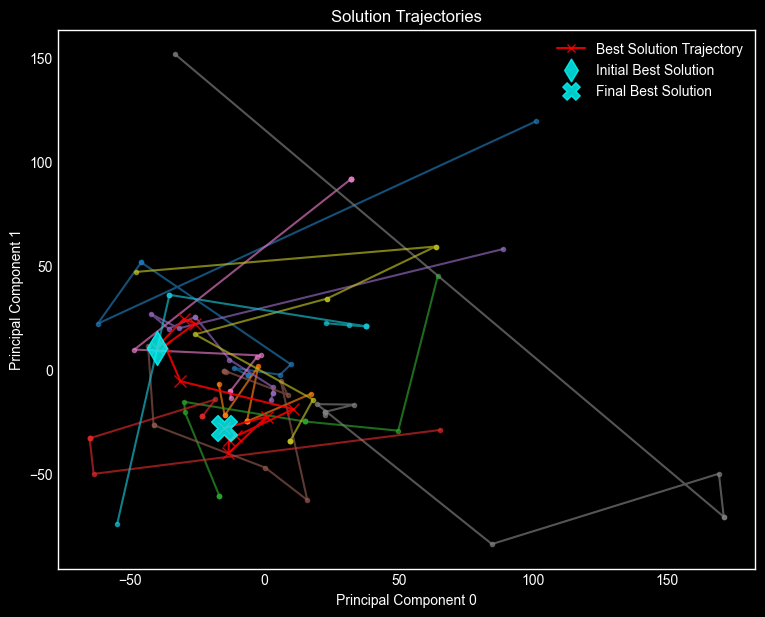

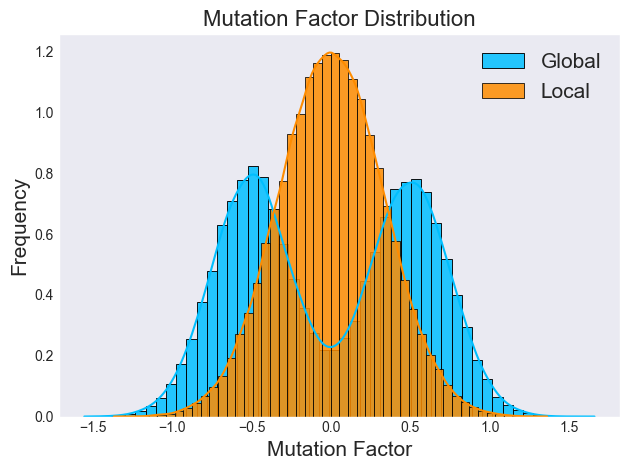

In [18]:
# global imports
import numpy as np
from scipy import stats
epsilon = 1e-12 # small epsilon to prevent zero-point errors


### test functions, for local testing ###

def rastrigin(x, vectorized=False):
    '''Rastrigin test function, for local testing.'''
    
    A = 10 # rastrigin coefficient
    
    # check if x is a matrix (2D) or a single vector (1D)
    matrix_flag = x.ndim > 1
    if matrix_flag:
        # for x of (popsize, dimensions)
        n = x.shape[1]
        rastrigin_value = A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x), axis=1)
    else:
        # for single solution vector x
        n = x.shape[0]
        rastrigin_value = A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))
    
    return rastrigin_value

def ackley(x, vectorized=False):
    '''Ackley test function, for local testing.'''
    
    # check if x is a matrix (2D) or a single vector (1D)
    matrix_flag = x.ndim > 1
    if matrix_flag:
        # for x of (popsize, dimensions)
        n = x.shape[1]
        arg1 = -0.2 * np.sqrt(1/n * np.sum(x**2, axis=1))
        arg2 = 1/n * np.sum(np.cos(2 * np.pi * x), axis=1)
    else:
        # for single solution vector x
        n = x.shape[0]
        arg1 = -0.2 * np.sqrt(1/n * np.sum(x**2))
        arg2 = 1/n * np.sum(np.cos(2 * np.pi * x))
    
    ackley_val = -20 * np.exp(arg1) - np.exp(arg2) + 20 + np.exp(1)
    
    return ackley_val

def sphere(x, vectorized=False):
    '''Sphere test function, for local testing.'''
    
    # check if x is a matrix (2D) or a single vector (1D)
    matrix_flag = x.ndim > 1
    if matrix_flag:
        sphere_val = np.sum(x**2, axis=1)
    else:
        sphere_val = np.sum(x**2)
    
    return sphere_val

def shifted_function(func, shift_vector, vectorized=False):
    '''
    Objective:
        - Shifts the global optimum of the given test function.
    
    Inputs:
        - func: Original test function.
        - shift_vector: 1D array of the new optimum.
    
    Outputs:
        - shifted_func: New function with the shifted optimum.
    '''
    
    def shifted_func(x, vectorized=False):
        return func(x - shift_vector, vectorized=vectorized)
    return shifted_func


### verbose plotting functions ###

def plot_mutations(n_points=100000):
    '''
    Plots the distribution of mutation factors for all mutation strategies.
    '''

    # ensure integer n_points
    n_points = int(n_points)

    # import matplotlib
    import matplotlib.pyplot as plt

    # mutation plot params
    dimensions = 1 # for plotting
    peak_loc = 0.5
    initial_std_loc = 0.25
    local_std = 0.33
    
    loc_signs = np.random.choice([-1.0, 1.0], size=(n_points, 1), p=[0.5, 0.5])
    locs = loc_signs * peak_loc
    base_mutations = np.random.normal(loc=0.0, scale=initial_std_loc, size=(n_points, dimensions))
    global_muts = base_mutations + locs
    global_muts_flat = global_muts.flatten()
    
    local_muts = np.random.normal(loc=0.0, scale=local_std, size=(n_points, dimensions))
    local_muts_flat = local_muts.flatten()
    
    try: # in case seaborn is not imported
        import seaborn as sns
        sns.set_style('dark')
        sns.histplot(x=global_muts_flat, bins=50, edgecolor='black',stat='density',kde=True,color='deepskyblue',alpha=0.85,label='Global')
        sns.histplot(x=local_muts_flat, bins=50, edgecolor='black',stat='density',kde=True,color='darkorange',alpha=0.85,label='Local')
    except:
        plt.rcParams['figure.facecolor'] = 'black'
        plt.rcParams['axes.facecolor'] = 'black'
        plt.rcParams['text.color'] = 'white'
        plt.rcParams['axes.labelcolor'] = 'white'
        plt.rcParams['xtick.color'] = 'white'
        plt.rcParams['ytick.color'] = 'white'
        plt.rcParams['axes.edgecolor'] = 'white'
        plt.rcParams['grid.color'] = 'white'
        plt.rcParams['lines.color'] = 'white'
        plt.hist(global_muts_flat, bins=50, edgecolor='black',density=True,color='deepskyblue',alpha=0.85,label='Global')
        plt.hist(local_muts_flat, bins=50, edgecolor='black',density=True,color='darkorange',alpha=0.85,label='Local')
    finally:
        plt.title('Mutation Factor Distribution',fontsize=16)
        plt.xlabel('Mutation Factor',fontsize=15)
        plt.ylabel('Frequency',fontsize=15)
        plt.legend(fontsize=15)
        
        plt.tight_layout()
        plt.show()


def plot_trajectories(obj_function, pop_history, best_history, bounds, num_to_plot):
    '''
    Plots the solution position history.
    '''
    
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    # visualization params
    plt.rcParams['figure.facecolor'] = 'black'
    plt.rcParams['axes.facecolor'] = 'black'
    plt.rcParams['text.color'] = 'white'
    plt.rcParams['axes.labelcolor'] = 'white'
    plt.rcParams['xtick.color'] = 'white'
    plt.rcParams['ytick.color'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'white'
    plt.rcParams['grid.color'] = 'white'
    plt.rcParams['lines.color'] = 'white'
    
    original_dims = bounds.shape[0]
    
    # convert to arrays
    plot_pop_history = np.array(pop_history)
    plot_best_history = np.array(best_history)
    
    # ensure bounds array has more than 2 dimensions
    if original_dims > 2:
        pca = PCA(n_components=2)
        
        # reshape data to fit PCA
        all_data = plot_pop_history.reshape(-1, original_dims)
        
        # fit PCA on population history
        pca.fit(all_data)

        # reshape data
        num_generations = plot_pop_history.shape[0]
        popsize = plot_pop_history.shape[1]
        
        # transform and reshape dadta
        plot_pop_history = pca.transform(all_data).reshape(num_generations, popsize, 2)
        plot_best_history = pca.transform(plot_best_history)
        
        # adjust bounds
        combined_transformed_data = np.concatenate([plot_pop_history.reshape(-1, 2), plot_best_history], axis=0)
        
        # ensure combined data is not empty
        if combined_transformed_data.size > 0:
            min_vals = np.min(combined_transformed_data, axis=0)
            max_vals = np.max(combined_transformed_data, axis=0)
            x_min, x_max = min_vals[0], max_vals[0]
            y_min, y_max = min_vals[1], max_vals[1]
        else:
            x_min, x_max = -1, 1
            y_min, y_max = -1, 1
    
    else:
        x_min, x_max = bounds[0, 0], bounds[0, 1]
        y_min, y_max = bounds[1, 0], bounds[1, 1]
    
    plt.figure(figsize=(9, 7))
    plt.xlabel('Principal Component 0')
    plt.ylabel('Principal Component 1')
    plt.title('Solution Trajectories')
    
    # objective function contour plot
    x = np.linspace(x_min, x_max, 100)
    y = np.linspace(y_min, y_max, 100)
    X, Y = np.meshgrid(x, y)
    xy_coords = np.vstack([X.ravel(), Y.ravel()]).T
    
    if plot_pop_history is not None:
        indices_to_plot = np.random.choice(plot_pop_history.shape[1], min(num_to_plot, plot_pop_history.shape[1]), replace=False)
        
        for i in indices_to_plot:
            x_coords = plot_pop_history[:, i, 0]
            y_coords = plot_pop_history[:, i, 1]
            plt.plot(x_coords, y_coords, linestyle='-', marker='o', markersize=3, alpha=0.67, zorder=1)

    # plot path of best solution
    if plot_best_history is not None:
        x_coords = plot_best_history[:, 0]
        y_coords = plot_best_history[:, 1]
        plt.plot(x_coords, y_coords, linestyle='-', marker='x', markersize=8, color='red', label='Best Solution Trajectory', 
                 alpha=0.85, zorder=2)
        plt.scatter(x_coords[0], y_coords[0], color='cyan', marker='d', s=300, label='Initial Best Solution', alpha=0.8, zorder=5)
        plt.scatter(x_coords[-1], y_coords[-1], color='cyan', marker='X', s=350, label='Final Best Solution', alpha=0.8, zorder=5)
    
    plt.legend(fontsize=10,markerscale=0.67)
    plt.grid(False)
    plt.show()


### evolution algorithm ###

def initialize_population(popsize, bounds, init, hds_weights, seed, verbose):
    '''
    Objective:
        - Initializes a population using Sobol, Adaptive Hyperellipsoid, or a custom population.
    '''

    # misc extracts
    n_dimensions = bounds.shape[0]
    init = init.lower()
    
    # if input is not a string assume it is the initial population
    if not isinstance(init, str):
        initial_population = init
        if verbose:
            print('Initializing custom population.')
    # generate adaptive hypersphere sequence
    elif init == 'hds':
        # import
        try:
            from . import hyperellipsoid_sampling as hds
        except ImportError:
            import hyperellipsoid_sampling as hds

        # generate samples
        if verbose:
            print('Initializing Hyperellipsoid vectors.')
        initial_population = hds.sample(popsize, bounds, weights=hds_weights, 
                                        seed=seed, verbose=False)

    # generate sobol sequence
    elif init == 'sobol':
        if verbose:
            print('Initializing Sobol vectors.')
        import warnings
        warnings.filterwarnings('ignore', category=UserWarning) # ignore power-of-2 warning
        sobol_sampler = stats.qmc.Sobol(d=n_dimensions, seed=seed)
        sobol_samples_unit = sobol_sampler.random(n=popsize)
        initial_population = stats.qmc.scale(sobol_samples_unit, bounds[:, 0], bounds[:, 1])

    elif init == 'lhs':
        if verbose:
            print('Initializing Latin Hypercube vectors.')
        lhs_sampler = stats.qmc.LatinHypercube(d=n_dimensions, seed=seed)
        lhs_samples_unit = lhs_sampler.random(n=popsize)
        initial_population = stats.qmc.scale(lhs_samples_unit, bounds[:, 0], bounds[:, 1])

    elif init == 'random':
        if verbose:
            print('Initializing random vectors.')
        initial_population = np.random.uniform(low=bounds[:, 0], high=bounds[:, 1], size=(popsize, n_dimensions))

    return initial_population

def evolve_generation(obj_function, population, fitnesses, best_solution, 
                      bounds, entangle_rate, generation, maxiter, 
                      vectorized, *args):
    '''
    Objective:
        - Evolves the population for the current generation.
            - Dynamic crossover rate:
                - Worst solution CR = 1.0, best solution CR = 0.33.
            - Local & global mutation factor distributions.
                - Can be displayed using the 'plot_mutations' function.
            - Greedy selection:
                - New solution vector is chosen as the better between of trial and current vectors.
            - Covariance reinitialization is handled externally.
    '''

    # crossover parameters
    base_crossover_proba = 1.0
    min_crossover_proba = 0.33
    
    if vectorized:
        dimensions, popsize = population.shape
        
        # select random entangled partners for all solutions
        random_indices = np.random.randint(0, popsize, size=popsize)
        entangled_partners = population[:, random_indices]

        # global mutation factor:
        global_std = 0.25
        global_peaks = 0.5
        is_positive_peak = np.random.choice([True, False], p=[0.5, 0.5])
        global_mutation = np.random.normal(loc=global_peaks, scale=global_std, 
                                            size=(dimensions,1)) if is_positive_peak else np.random.normal(loc=-global_peaks, 
                                            scale=global_std, size=(dimensions,1))

        # local mutation factor:
        local_mutation_std = 0.33
        local_mutation = np.random.normal(0.0, local_mutation_std, size=(dimensions,1))
        
        # best solution as a column vector (dimensions, 1)
        best_solution_broadcast = best_solution[:, np.newaxis]

        # identify solution indices to use Spooky-Best strategy
        local_indices = np.random.rand(1, popsize) < entangle_rate

        # global mutations
        mutant_vectors_current = population + global_mutation * (best_solution_broadcast - entangled_partners)
        mutant_vectors_random = entangled_partners + global_mutation * (population - entangled_partners)
        
        # 50% chance of using Spooky-Random, otherwise Spooky-Current
        entangled_random_indices = np.random.rand(1, popsize) < 0.5
        
        # select between the two global mutations
        global_mutants = np.where(entangled_random_indices, mutant_vectors_random, mutant_vectors_current)
        
        # select between local and global mutations
        mutant_vectors = np.where(local_indices, best_solution_broadcast + local_mutation * (population - entangled_partners), 
                                  global_mutants)
        
        # rank solutions by fitness
        sorted_indices = np.argsort(fitnesses)
        ranks = np.zeros_like(fitnesses)
        ranks[sorted_indices] = np.arange(popsize)
        max_rank = popsize - 1

        # calculate adaptive crossover rates
        relative_fitness = (max_rank - ranks) / max_rank
        adaptive_crossover_proba_raw = (1 - base_crossover_proba) + base_crossover_proba * relative_fitness
        adaptive_crossover_proba = np.maximum(adaptive_crossover_proba_raw, min_crossover_proba)

        # apply crossover to create trial vectors
        crossover_indices = np.random.rand(dimensions, popsize) < adaptive_crossover_proba
        trial_vectors = np.where(crossover_indices, mutant_vectors, population)

        # clip trial vectors to bounds
        trial_vectors = np.clip(trial_vectors, bounds[:, np.newaxis, 0], bounds[:, np.newaxis, 1])
        
        # steady-state elitism selection
        trial_fitnesses = obj_function(trial_vectors.T, *args)
        selection_indices = trial_fitnesses < fitnesses
        
        new_population = np.where(selection_indices[np.newaxis, :], trial_vectors, population)
        new_fitnesses = np.where(selection_indices, trial_fitnesses, fitnesses)
        
        return new_population, new_fitnesses
        
    else:
        # extract shape
        popsize, dimensions = population.shape

        # initialize arrays
        new_population = np.zeros_like(population)
        new_fitnesses = np.zeros_like(fitnesses)

        # global mutation factor
        global_std = 0.25
        global_peaks = 0.5
        is_positive_peak = np.random.choice([True, False], p=[0.5, 0.5])
        global_mutation = np.random.normal(loc=global_peaks, scale=global_std, 
                                           size=dimensions) if is_positive_peak else np.random.normal(loc=-global_peaks, 
                                                                                      scale=global_std, size=dimensions)
        
        # local mutation factor
        local_mutation_std = 0.33
        local_mutation = np.random.normal(0.0, local_mutation_std, size=dimensions)

        # adaptive crossover calculations
        sorted_indices = np.argsort(fitnesses)
        ranks = np.zeros_like(fitnesses)
        ranks[sorted_indices] = np.arange(popsize)
        max_rank = popsize - 1
        relative_fitness = (max_rank - ranks) / max_rank
        adaptive_crossover_proba_raw = (1 - base_crossover_proba) + base_crossover_proba * relative_fitness
        adaptive_crossover_proba = np.maximum(adaptive_crossover_proba_raw, min_crossover_proba)
        
        # loop through each solution in population
        for i in range(popsize):
            solution = population[i]
            current_fitness = fitnesses[i]

            # select random 'entangled' partner indices
            random_index = np.random.randint(0, popsize)
            entangled_partner = population[random_index]

            # apply mutations
            if np.random.rand() < entangle_rate:
                mutant_vector = best_solution + local_mutation * (solution - entangled_partner) # original
            else:
                # 50% chance of moving around current location
                mutant_vector = solution + global_mutation * (best_solution - entangled_partner) # original
                # 50% chance of moving to entangled partner
                if np.random.rand() < 0.5:
                    mutant_vector = entangled_partner + global_mutation * (solution - entangled_partner) # original
            
            crossover_indices = np.random.rand(dimensions) < adaptive_crossover_proba[i]
            trial_vector = np.where(crossover_indices, mutant_vector, solution)

            # clip trial vectors to bounds
            trial_vector = np.clip(trial_vector, bounds[:, 0], bounds[:, 1])

            # steady-state elitism selection
            trial_fitness = obj_function(trial_vector, *args)
            
            if trial_fitness < current_fitness:
                new_population[i] = trial_vector
                new_fitnesses[i] = trial_fitness
            else:
                new_population[i] = solution
                new_fitnesses[i] = current_fitness
        
        return new_population, new_fitnesses

def covariance_reinit(population, current_fitnesses, bounds, vectorized):
    '''
    Objective:
        - Reinitializes the worst 33% solutions in the population.
        - Locations are determined based on a Gaussian distribution from the covariance matrix of 25% best solutions.
            - Noise is added to enhance diversity.
        - Probability decays to 33% at the 33% generation.
        - Conceptualizes particles tunneling to a more stable location.
    '''

    # reshape depending on vectorized input
    if vectorized:
        dimensions, popsize = population.shape
    else:
        popsize, dimensions = population.shape

    # handle case where not enough points for covariance matrix
    if popsize < dimensions + 1:
        return population

    # keep 25% of best solutions
    num_to_keep_factor = 0.25
    num_to_keep = int(popsize * num_to_keep_factor)
    if num_to_keep <= dimensions:
        num_to_keep = dimensions + 1 # minimum sample size scaled by dimensions
    
    # identify best solutions to calculate covariance gaussian model
    sorted_indices = np.argsort(current_fitnesses)
    best_indices = sorted_indices[:num_to_keep]
    if vectorized:
        best_solutions = population[:, best_indices]
    else:
        best_solutions = population[best_indices]
    
    # learn full-covariance matrix
    if vectorized:
        mean_vector = np.mean(best_solutions, axis=1)
        cov_matrix = np.cov(best_solutions)
    else:
        mean_vector = np.mean(best_solutions, axis=0)
        cov_matrix = np.cov(best_solutions, rowvar=False)

    # add epsilon to the diagonal to prevent singular matrix issues
    cov_matrix += np.eye(dimensions) * epsilon

    # identify solutions to be reset
    reset_population = 0.33
    num_to_replace = int(popsize * reset_population)
    worst_indices = sorted_indices[-num_to_replace:]

    # new solutions sampled from multivariate normal distribution
    if vectorized:
        new_solutions_sampled = np.random.multivariate_normal(mean=mean_vector, cov=cov_matrix, size=num_to_replace).T
    else:
        new_solutions_sampled = np.random.multivariate_normal(mean=mean_vector, cov=cov_matrix, size=num_to_replace)
    
    # add noise for exploration
    noise_scale = (bounds[:, 1] - bounds[:, 0]) / 20.0
    if vectorized:
        noise = np.random.normal(0, noise_scale[:, np.newaxis], size=new_solutions_sampled.shape)
        new_solutions = new_solutions_sampled + noise
    else:
        noise = np.random.normal(0, noise_scale, size=new_solutions_sampled.shape)
        new_solutions = new_solutions_sampled + noise

    # clip new solutions to bounds
    if vectorized:
        population[:, worst_indices] = np.clip(new_solutions, bounds[:, np.newaxis, 0], bounds[:, np.newaxis, 1])
    else:
        population[worst_indices] = np.clip(new_solutions, bounds[:, 0], bounds[:, 1])

    return population

def optimize(func, bounds, args=(), 
              init='sobol', popsize=None, maxiter=100,
              entangle_rate=0.33, polish=True,
              patience=np.inf, vectorized=False, 
              verbose=True, num_to_plot=10,
              hds_weights=None,
              seed=None):
    '''
    Objective:
        - Searches for the optimal solution to minimize the objective function.
        - Conceptualizes quantum stellar particles searching for the most stable energy state.
        - Mutation factors can be visualized with plot_mutations().
    Inputs:
        - func: Objective function to minimize.
        - bounds: Parameter bounds.
        - *args: Input arguments for objective function.
        - init: Initial population sampling method. 
            - Options are 'sobol', 'random', 'hds', 'lhs', or a custom sample sequence.
                - Defaults to 'sobol'.
                - 'hds' to accelerate convergence with slower initialization.
        - popsize: Number of solution vectors to evolve. 
            - Defaults to 10 * n_dimensions.
        - maxiter: Number of generations to evolve.
        - entangle_rate: Probability of solutions using the local Spooky-Best mutation strategy.
            - Defaults to 0.33. This causes to the three mutation strategies to be applied equally.
            - Decreasing leads to higher exploration.
        - patience: Number of generations without improvement before early convergence.
        - polish: Final polishing step using 'L-BFGS-B' minimization.
        - vectorized: Boolean to accept vectorized objective functions.
        - verbose: Displays prints and plots.
        - num_to_plot: Number of solution trajectories to display in the verbose plot.
    Outputs:
        - (best_solution, best_fitness) tuple:
            - best_solution: Best solution found.
            - best_fitness: Fitness of the optimal solution.
    '''

    # set random seed
    if seed == None:
        np.random.seed()
    else:
        np.random.seed(seed)

    # handle case where time is not imported
    if verbose:
        try:
            import time
            start_time = time.time()
        except:
            pass

    # # convert obj func args to tuples (needed for scipy minimize)
    # if not isinstance(args, tuple):
    #     args = tuple(args)
        
    # raise errors for invalid inputs:
    # entangle rate error
    if not 0.0 <= entangle_rate <= 1.0:
        raise ValueError('Entanglement rate must be between [0,1].')

    # initialization method error
    init = init.lower()
    if (type(init) == str) and init not in ['sobol','hds','random','lhs']:
        raise ValueError("Initial sampler must be one of ['sobol','random','ahs','lhs'], or a custom population.")
    
    # patience error
    if patience <= 1:
        raise ValueError('Patience must be > 1 generation.')
    
    # initialize histories
    pop_history = []
    best_history = []

    # ensure bounds is array; shape (n_dimensions,2)
    bounds = np.array(bounds)
    n_dimensions = bounds.shape[0]
    
    # if init is not a string, assume it is a custom population
    if not isinstance(init, str):
        popsize = init.shape[0]
        
    # default popsize to 10*n_dimensions
    if popsize == None:
        popsize = 10*n_dimensions

    # ensure integers
    popsize, maxiter = int(popsize), int(maxiter)

    # generate initial population
    initial_population = initialize_population(popsize, bounds, init, hds_weights, seed, verbose)
    if verbose:
        print('\nEvolving population:')

    # match differential evolution conventions
    if vectorized:
        initial_population = initial_population.T
        initial_fitnesses = func(initial_population.T, *args)
    else:
        initial_fitnesses = np.array([func(sol, *args) for sol in initial_population])

    # calculate initial best fitness
    min_fitness_idx = np.argmin(initial_fitnesses)
    initial_best_fitness = initial_fitnesses[min_fitness_idx]

    # identify initial best solution
    if vectorized:
        initial_best_solution = initial_population[:, min_fitness_idx].copy()
    else:
        initial_best_solution = initial_population[min_fitness_idx].copy()

    # initialze population and fitnesses
    population = initial_population
    current_fitnesses = initial_fitnesses

    # add initial population to population history
    if verbose:
        if vectorized:
            pop_history.append(population.T.copy())
        else:
            pop_history.append(population.copy())

    # add initial best solution to best solution history
    best_history.append(initial_best_solution.copy())
    
    # initialize best solution and fitness
    best_solution = initial_best_solution
    best_fitness = initial_best_fitness
    
    # iterate through generations
    last_improvement_gen = 0
    for generation in range(maxiter):
        
        # evolve population
        if vectorized:
            population, current_fitnesses = evolve_generation(func, population, current_fitnesses, best_solution, bounds, 
                                                             entangle_rate, generation, maxiter, vectorized, *args)
        else:
            population, current_fitnesses = evolve_generation(func, population, current_fitnesses, best_solution, bounds, 
                                                             entangle_rate, generation, maxiter, vectorized, *args)
        
        # update best solution found
        min_fitness_idx = np.argmin(current_fitnesses)
        current_best_fitness = current_fitnesses[min_fitness_idx]

        # identify current best solution
        if vectorized:
            current_best_solution = population[:, min_fitness_idx].copy()
        else:
            current_best_solution = population[min_fitness_idx].copy()

        # update best known solution
        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_solution = current_best_solution
            last_improvement_gen = 0
        else:
            last_improvement_gen += 1

        # apply asymptotic covariance reinitialization to population
        final_proba = 0.33
        decay_generation = 0.33
        reinit_proba = np.e**((np.log(final_proba)/(decay_generation*maxiter))*generation)
        if np.random.rand() < reinit_proba:
            population = covariance_reinit(population, current_fitnesses, bounds, vectorized=vectorized)

        # clip population to bounds
        if vectorized:
            population = np.clip(population, bounds[:, np.newaxis, 0], bounds[:, np.newaxis, 1])
        else:
            population = np.clip(population, bounds[:, 0], bounds[:, 1])

        # add to population history
        if verbose:
            if vectorized:
                pop_history.append(population.T.copy())
            else:
                pop_history.append(population.copy())
            best_history.append(best_solution.copy())

        # print generation status
        if verbose:
            stdev = np.std(current_fitnesses)
            print(f' Gen. {generation+1}/{maxiter} | f(x)={best_fitness:.2e} | stdev={stdev:.2e} | reinit={reinit_proba:.2f}')

        # patience for early convergence
        if (generation - last_improvement_gen) > patience:
            if verbose:
                print(f'\nEarly convergence: generations without improvement exceeds patience ({patience}).')
            break

    # polish final solution step via L-BFGS-B
    if polish:
        print('Polishing solution.')
        try:
            from scipy.optimize import minimize
            if vectorized:
                res = minimize(func, best_solution, args=args, bounds=bounds, method='L-BFGS-B', tol=0)
            else:
                res = minimize(func, best_solution, args=args, bounds=bounds, method='L-BFGS-B', tol=0)
            if res.success:
                best_solution = res.x
                best_fitness = res.fun
        except Exception as e:
            print(f'Polishing failed: {e}')

    # final solution prints
    if verbose:
        print('\nResults:')

        # print best fitness
        print(f'- f(x): {best_fitness:.2e}')
        
        #print best solution
        if len(best_solution)>3:
            formatted_display = ', '.join([f'{val:.2e}' for val in best_solution[:3]])
            print(f'- Solution: [{formatted_display}, ...]')
        else:
            formatted_display = ', '.join([f'{val:.2e}' for val in best_solution])
            print(f'- Solution: [{formatted_display}]')

        # print optimization time
        try:
            print(f'- Elapsed: {(time.time() - start_time):.3f}s')
        except Exception as e:
            print(f'- Elapsed: null') # case where time isn't imported
        
        # plotting
        print()
        try:
            plot_trajectories(func, pop_history, best_history, bounds, num_to_plot)

        except Exception as e:
            print(f'Failed to generate plots: {e}')
    
    return (best_solution, best_fitness)


# example evolution:

# define bounds
n_dimensions = 10
bounds = np.array([(-100.0, 100.0)] * n_dimensions)
upper_bound = bounds[0][1]

# misc parameters
popsize = 100
max_generations = 10
vectorized = True

# define desired test function
base_obj = rastrigin
shift_vector = np.full(n_dimensions, -25)
# shifting the test function's minimum by shift vector
obj = shifted_function(base_obj,shift_vector,vectorized=vectorized)
input_args = [vectorized] # inputs to objective function

# custom initial population
initial_population = np.random.uniform(low=bounds[:, 0], high=bounds[:, 1], size=(popsize, n_dimensions))

# using HDS gaussian weights
weights = {
    0: {'center': 0.25, 'std': 0.25},
    1: {'center': 0.25, 'std': 0.25}
    }
    
# run QUASAR evolution
results = optimize(
    obj,
    bounds,
    args=input_args,
    popsize=popsize,
    maxiter=max_generations,
    init='hds',
    hds_weights=weights,
    # init = initial_population, # for a custom population
    entangle_rate = 0.33,
    patience=np.inf,
    verbose=True,
    polish=False,
    vectorized=vectorized,
    seed=8,
    num_to_plot=10
    )

# extract results
best_solution = results[0]
best_fitness = results[1]
plot_mutations()

# Experimental Trials - CEC2017 Functions

In [8]:
from scipy.optimize import differential_evolution
import os
import warnings
import time
import pandas as pd
import numpy as np
import random
from scipy import stats
from opfunu.cec_based import cec2017
from mealpy.evolutionary_based.SHADE import L_SHADE
from mealpy import Problem, FloatVar
import logging
import joblib
from joblib import Parallel, delayed
from filelock import FileLock
os.environ['PYTHONWARNINGS'] = 'ignore::UserWarning:scipy.stats'
warnings.filterwarnings('ignore',category=UserWarning)


# optimization hyperparameters
tol = 0
atol = 0
polish = False
disp = False

# # dimension-variant experiment parameters
# samples_to_test = [1000]
# dimensions_to_test = [10, 30, 50, 100]

# # sample-variant experiment parameters
# samples_to_test = [100,250,500,2000,5000]
samples_to_test = [5000] # missed this one in the original 
dimensions_to_test = [100]

# CEC Standard Bounds
cec_bounds = [(-100, 100)]
lower_bound = -100 # defining bounds again for LSHADE
upper_bound = 100 # defining bounds again for LSHADE
functions_to_test = [f for f in dir(cec2017) if f.startswith('F') and f[1:].isdigit()]
num_trials = 30 # total trials to run
max_iterations = 100

results_filename = 'optimizer_cec_results_samples_test.csv'
lock_file = f'{results_filename}.lock'

def save_result_cec(method, iterations, fitness_value, n_dimensions, n_samples, bounds, function_name, run_time, trial_num, 
                    filename=results_filename):
    
    # use first bound pair as string
    bounds_str = str(bounds[0]) if bounds else 'N/A' 
    
    new_record = pd.DataFrame([{
        'Method': method,
        'trial_num': trial_num,
        'Bounds': bounds_str,
        'Dimensions': n_dimensions,
        'Samples': n_samples,
        'Iterations': iterations,
        'Function': function_name,
        'Fitness_Value': fitness_value,
        'Run_Time_Sec': run_time
        }])

    # save to csv
    with FileLock(lock_file): # lock file to ensure no data corruption
        if not os.path.exists(filename):
            new_record.to_csv(filename, index=False, mode='w')
        else:
            new_record.to_csv(filename, index=False, mode='a', header=False)


class CECProblem(Problem):
    # pass dimension N and the range [lower, upper]
    def __init__(self, cec_func_instance, n_dimensions, lower_bound, upper_bound):
        # define the bounds object for N dimensions within [lower_bound, upper_bound]
        bounds_obj = FloatVar(lb=[lower_bound] * n_dimensions, 
                              ub=[upper_bound] * n_dimensions)
        
        # initialize problem class
        super().__init__(bounds=bounds_obj, 
                         minmax='min', 
                         obj_func=cec_func_instance.evaluate)
        
    # mealpy's solve method will uses solution vector of length n_dimensions
    # 'solution' from mealpy is 1D array
    def __call__(self, solution):
        solution_array = np.asarray(solution).flatten()
        return self.obj_func(solution_array)




def run_single_experiment(trial_num, function_name, b_val, n_dimensions, n_samples, maxiter):
    '''
    Runs one complete experiment for a single combination of trial, function,
    dimension, and sample size, testing QUASAR, DE, and LSHADE.
    '''
    
    # environment parameters
    logging.disable(logging.CRITICAL)
    seed = trial_num # ensure reproducable seed as trial_num
    np.random.seed(seed)  
    random.seed(seed)
    bounds = [b_val] * n_dimensions
    
    # correcting DE popsize since it scales as (n_samples + n_dim_not_equal_bounds) / n_dimensions; all dim same bounds
    de_popsize_corrected = int((n_samples - 1) / n_dimensions)
    
    cec_func_class = getattr(cec2017, function_name)
    func_instance = cec_func_class(ndim=n_dimensions)

    # QUASAR test
    start_time_ee = time.time()
    results_ee = optimize(
        func=func_instance.evaluate,
        bounds=bounds,
        popsize=n_samples,
        maxiter=maxiter,
        polish=polish,
        verbose=disp,
        seed=seed
    )
    
    run_time_ee = time.time() - start_time_ee
    ee_best_fitness = results_ee[1]
    save_result_cec('QUASAR', maxiter, ee_best_fitness, n_dimensions, n_samples, cec_bounds, function_name, run_time_ee, trial_num)

    # DE test
    start_time_de = time.time()
    de_evolution_results = differential_evolution(
        func=func_instance.evaluate,
        bounds=bounds,
        maxiter=maxiter,
        popsize=de_popsize_corrected,
        polish=polish,
        atol=atol,
        tol=tol,
        disp=disp,
        seed=seed 
    )
    run_time_de = time.time() - start_time_de
    save_result_cec('DE', maxiter, de_evolution_results.fun, n_dimensions, n_samples, cec_bounds, function_name, run_time_de, trial_num)
    
    # LSHADE test
    NP_init = n_samples
    NP_min = 4
    problem = CECProblem(func_instance, n_dimensions, lower_bound, upper_bound)
    lshade_model = L_SHADE(
        epoch=maxiter, 
        pop_size=n_samples, 
        min_pop_size=NP_min, 
        verbose=False,
        seed=seed
        )
    
    start_time_lshade = time.time()
    result_agent = lshade_model.solve(problem)
    run_time_lshade = time.time() - start_time_lshade
    
    lbest_fitness = 1e99 
    if result_agent.solution is not None:
        # re evaluate best solution for safety
        lbest_fitness = problem(result_agent.solution) 
    
    save_result_cec('LSHADE', maxiter, lbest_fitness, n_dimensions, n_samples, cec_bounds, function_name, run_time_lshade, trial_num)
    
    return f'Completed F={function_name}, D={n_dimensions}, NP={n_samples} on Trial {trial_num} successfully.'

# collect jobs
jobs = []
for trial_num in range(0, num_trials):
    for function_name in functions_to_test:
        for b_val in cec_bounds:
            for n_dimensions in dimensions_to_test:
                for n_samples in samples_to_test:
                    # add job parameters
                    jobs.append((
                        trial_num,
                        function_name,
                        b_val,
                        n_dimensions,
                        n_samples,
                        max_iterations
                        ))
                        
print(f'Total independent experiments to run: {len(jobs)}\n')


print(f'Running {len(jobs)} parallelized trials.')

# results = Parallel(n_jobs=-1, verbose=5)(
#     delayed(run_single_experiment)(*job_params) for job_params in jobs
#     )

print('\nAll trials completed.')

Total independent experiments to run: 870

Running 870 parallelized trials.

All trials completed.


# Experimental Analysis

### by Dimension

Number of trials in file: 30
Total number of records in file: 10440

OVERALL AGGREGATED RANK SUM


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Method
QUASAR    150.0
LSHADE    229.0
DE        305.0
dtype: float64

Saved plot: results_fitness_dimensions.png
Saved plot: results_runtime_dimensions.png
GMERF:


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,GM Error Ratio LSHADE/QUASAR,95% CI (L/Q),GM Error Ratio DE/QUASAR,95% CI (D/Q),p-value (Q vs LSHADE),p-value (Q vs DE),QUASAR (Geom Mean),LSHADE (Geom Mean),DE (Geom Mean)
10,1.30,"(1.20, 1.40)",1.06,"(1.01, 1.12)",6.608e-16,7.398e-03,1.592e+03,2.098e+03,1.722e+03
30,4.14,"(3.62, 4.74)",4.94,"(4.24, 5.77)",4.575e-91,3.046e-108,5.097e+03,2.111e+04,2.520e+04
50,3.78,"(3.32, 4.31)",8.44,"(7.09, 10.04)",9.442e-79,4.642e-134,1.459e+04,5.514e+04,1.231e+05
100,2.67,"(2.32, 3.06)",13.52,"(10.95, 16.68)",2.104e-36,2.316e-141,7.917e+04,2.111e+05,1.070e+06


Run time ratio:


,Run Time Ratio LSHADE/QUASAR,95% CI (L/Q),Run Time Ratio DE/QUASAR,95% CI (D/Q),p-value (Q vs LSHADE),p-value (Q vs DE),QUASAR (Mean Sec),LSHADE (Mean Sec),DE (Mean Sec)
10,4.21,"(6.65, 7.26)",1.26,"(1.45, 1.49)",5.295e-144,7.349e-141,16.420,69.056,20.666
30,3.17,"(6.17, 6.77)",1.17,"(1.40, 1.45)",5.295e-144,1.065e-139,25.015,79.350,29.152
50,2.66,"(5.91, 6.50)",1.14,"(1.40, 1.44)",5.295e-144,1.647e-137,33.501,89.008,38.100
100,2.03,"(5.25, 5.77)",1.09,"(1.34, 1.38)",5.295e-144,2.912e-137,55.406,112.359,60.519



Overall GMERF:
LSHADE / QUASAR Overall GMERF: 2.713x (95% CI: 1.173, 6.273) (p=5.542e-57)
DE / QUASAR Overall GMERF: 4.944x (95% CI: 0.851, 28.728) (p=6.033e-142)

Overall average run time ratio:
LSHADE / QUASAR Overall run time ratio: 6.286x (95% CI: 5.329, 7.244) (p=5.295e-144)
DE / QUASAR Overall run time ratio:     1.418x (95% CI: 1.343, 1.492) (p=2.280e-140)


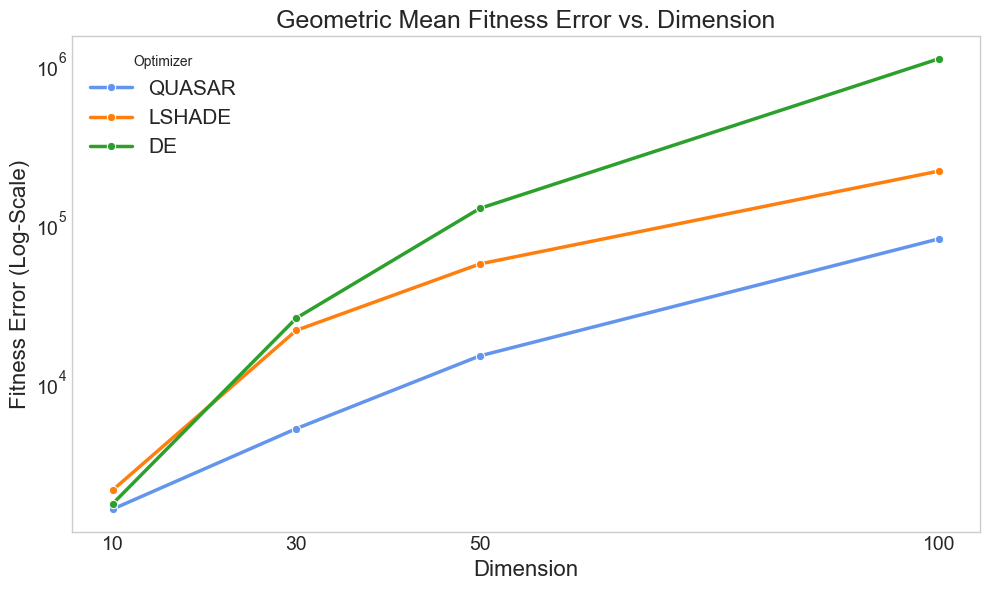

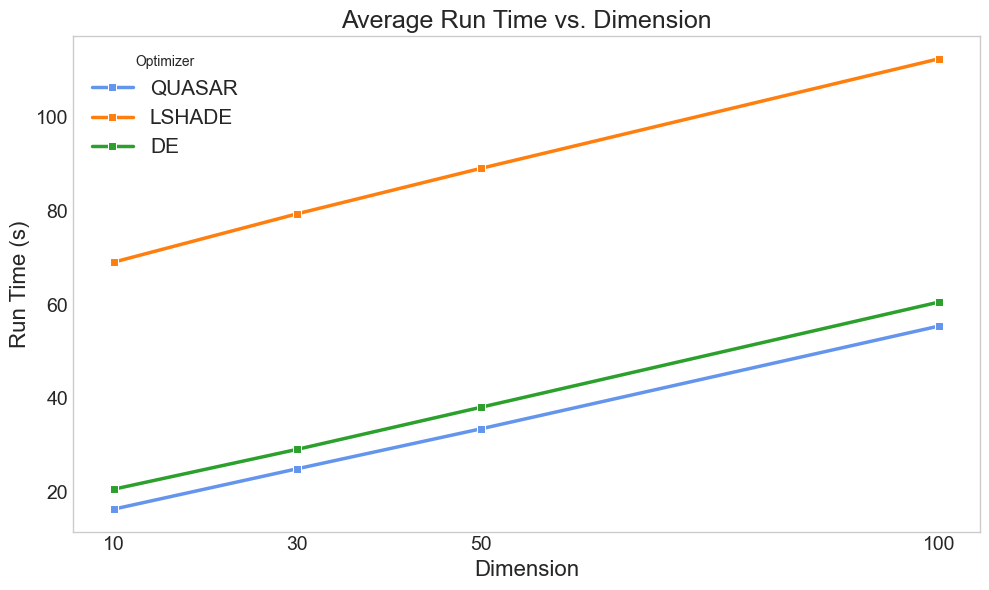

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats
import warnings

# suppress warnings
os.environ['PYTHONWARNINGS'] = 'ignore::UserWarning:scipy.stats'
warnings.filterwarnings('ignore', category=UserWarning)

sns.set_style('dark')

# where to store results
results_filename = 'optimizer_cec_results_dimensions.csv'
export_folder = 'results'
optimizer_order = ['QUASAR', 'LSHADE', 'DE']

def get_overall_wilcoxon_p_value(df_full, metric_col, method1, method2):
    '''
    Calculates the overall Wilcoxon signed-rank test p-value for the difference
    in a metric between two methods across all dimensions and functions.
    Uses 'run' index as dimension / function combination.
    '''
    
    # pivot on all combinations
    df_pivot = df_full.pivot_table(
        index=['Run'],
        columns='Method',
        values=metric_col
    ).dropna()
    
    if method1 not in df_pivot.columns or method2 not in df_pivot.columns or len(df_pivot) < 2:
        return np.nan
    
    # Wilcoxon signed-rank test on the paired differences
    wilcoxon_statistic, p_value = stats.wilcoxon(
        df_pivot[method1],
        df_pivot[method2],
        zero_method='pratt',
        alternative='two-sided' # two sided for general comparison
        )
    return p_value
    

def calculate_aggregated_rank_sum(df_full, rank_metric='Fitness_Value'):
    '''
    Calculates the Aggregated Rank Sum for each method across all unique
    experimental scenarios (Function, Dimensions).
    '''
    
    scenario_groups = ['Function', 'Dimensions', 'Method'] 
    
    df_median = df_full.groupby(scenario_groups)[rank_metric].median().reset_index()
    df_median = df_median.rename(columns={rank_metric: 'Median_Error'})
    
    df_pivot = df_median.pivot_table(
        index=['Function', 'Dimensions'], 
        columns='Method', 
        values='Median_Error'
        )
    
    present_methods = [m for m in optimizer_order if m in df_pivot.columns]
    df_pivot_ranked = df_pivot[present_methods].fillna(np.inf)
    
    df_ranks = df_pivot_ranked.rank(axis=1, method='average', ascending=True)
    
    aggregated_rank_sum = df_ranks.sum(axis=0).sort_values()
    os.makedirs('results', exist_ok=True)
    aggregated_rank_sum.to_csv('results/ranks_dimensions.csv')
    return aggregated_rank_sum

def get_p_value_wilcoxon_paired_fitness(df_full, dim, method1='QUASAR', method2='DE'):
    df_dim = df_full[df_full['Dimensions'] == dim]
    df_pivot = df_dim.pivot_table(index=['Run'],columns='Method',values='Fitness_Value').dropna()
    if method1 not in df_pivot.columns or method2 not in df_pivot.columns or len(df_pivot) < 2:
        return np.nan
    wilcoxon_statistic, p_value = stats.wilcoxon(
        df_pivot[method1],
        df_pivot[method2],
        zero_method='pratt' 
        )
    return p_value

def get_p_value_wilcoxon_paired_runtime(df_full, dim, method1='QUASAR', method2='DE'):
    df_dim = df_full[df_full['Dimensions'] == dim]
    df_pivot = df_dim.pivot_table(
        index=['Run'],
        columns='Method',
        values='Run_Time_Sec'
    ).dropna()
    if method1 not in df_pivot.columns or method2 not in df_pivot.columns or len(df_pivot) < 2:
        return np.nan
    wilcoxon_statistic, p_value = stats.wilcoxon(
        df_pivot[method1],
        df_pivot[method2],
        zero_method='pratt'
    )
    return p_value

def calculate_ci_for_paired_ratio(df_dim, metric_col, method_num, method_den, is_geometric=False, alpha=0.05):
    '''
    Calculates the mean of the paired ratios (Geometric for fitness, Arithmetic for run time)
    and its confidence interval for a specific dimension.
    '''
    df_pivot = df_dim.pivot_table(
        index=['Run'],
        columns='Method',
        values=metric_col
    ).dropna()
    if method_num not in df_pivot.columns or method_den not in df_pivot.columns or len(df_pivot) < 2:
        return np.nan, (np.nan, np.nan)
        
    den_values = df_pivot[method_den].replace(0, 1e-300)
    ratio_col = df_pivot[method_num] / den_values
    N = len(ratio_col)
    t_critical = stats.t.ppf(1 - alpha/2, N - 1)
    
    if is_geometric:
        log_ratio = np.log10(ratio_col.replace(0, 1e-300))
        mean_log = log_ratio.mean()
        std_log = log_ratio.std()
        se_log = std_log / np.sqrt(N)
        ci_lower_log = mean_log - t_critical * se_log
        ci_upper_log = mean_log + t_critical * se_log
        ratio_value = 10**mean_log
        ci = (10**ci_lower_log, 10**ci_upper_log)
    else:
        # arithmetic mean of paired ratios
        ratio_value = ratio_col.mean()
        std_ratio = ratio_col.std()
        se_ratio = std_ratio / np.sqrt(N)
        ci_lower = ratio_value - t_critical * se_ratio
        ci_upper = ratio_value + t_critical * se_ratio
        ci = (ci_lower, ci_upper)
        
    return ratio_value, ci

def get_ratio_metrics(df_full, dim, method_num, method_den):
    df_dim = df_full[df_full['Dimensions'] == dim]
    gmr, gmr_ci = calculate_ci_for_paired_ratio(
        df_dim, metric_col='Fitness_Value', method_num=method_num, method_den=method_den, is_geometric=True
    )
    amr, amr_ci = calculate_ci_for_paired_ratio(
        df_dim, metric_col='Run_Time_Sec', method_num=method_num, method_den=method_den, is_geometric=False
    )
    return gmr, gmr_ci, amr, amr_ci 

def load_and_aggregate_data(filename):
    df = pd.read_csv(filename)
    print(f'Number of trials in file: {df['trial_num'].nunique()}')
    print(f'Total number of records in file: {len(df)}')
    
    if 'Run' not in df.columns:
        df['Run'] = df['trial_num'].astype(str) + '_' + df['Function']
        
    agg_df = df.groupby(['Method', 'Dimensions']).agg(
        Mean_Fitness=('Fitness_Value', 'mean'),
        Std_Fitness=('Fitness_Value', 'std'),
        Mean_Runtime_Sec=('Run_Time_Sec', 'mean'),
        Std_Runtime_Sec=('Run_Time_Sec', 'std')
        ).reset_index()

    df['Log_Fitness'] = np.log10(df['Fitness_Value'].replace(0, 1e-300))
    geom_agg_df = df.groupby(['Method', 'Dimensions'])['Log_Fitness'].mean().reset_index()
    geom_agg_df['Geom_Mean_Fitness'] = 10**geom_agg_df['Log_Fitness']
    
    agg_df = agg_df.merge(geom_agg_df[['Method', 'Dimensions', 'Geom_Mean_Fitness']],
                          on=['Method', 'Dimensions'])

    return agg_df, df

def generate_plots(agg_df):
    os.makedirs('results', exist_ok=True)
    agg_df['Method'] = pd.Categorical(agg_df['Method'], categories=optimizer_order, ordered=True)
    agg_df = agg_df.sort_values('Method')
    custom_palette = {'QUASAR': 'cornflowerblue', 'LSHADE': 'C1', 'DE': 'C2'}
    dims = sorted(agg_df['Dimensions'].unique())

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=agg_df, x='Dimensions', y='Geom_Mean_Fitness', hue='Method', marker='o', errorbar=None, palette=custom_palette, linewidth=2.5)
    plt.yscale('log')
    plt.title('Geometric Mean Fitness Error vs. Dimension', fontsize=18)
    plt.xlabel('Dimension', fontsize=16)
    plt.ylabel('Fitness Error (Log-Scale)', fontsize=16)
    plt.legend(title='Optimizer', fontsize=15)
    plt.xticks(dims, fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(rf'results/{export_folder}_fitness_dimensions.png', dpi=300)
    print(f'Saved plot: {export_folder}_fitness_dimensions.png')

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=agg_df, x='Dimensions', y='Mean_Runtime_Sec', hue='Method', marker='s', palette=custom_palette, errorbar=None, linewidth=2.5)
    plt.title('Average Run Time vs. Dimension', fontsize=18)
    plt.xlabel('Dimension', fontsize=16)
    plt.ylabel('Run Time (s)', fontsize=16)
    plt.legend(title='Optimizer', fontsize=15)
    plt.xticks(dims, fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(rf'results/{export_folder}_runtime_dimensions.png', dpi=300)
    print(f'Saved plot: {export_folder}_runtime_dimensions.png')

def generate_tables(agg_df, df_full):
    dims = sorted(agg_df['Dimensions'].unique())
    
    # metrics for all combinations
    ratio_ql_data = [get_ratio_metrics(df_full, d, 'LSHADE', 'QUASAR') for d in dims]
    ratio_qd_data = [get_ratio_metrics(df_full, d, 'DE', 'QUASAR') for d in dims]

    # GMERF calculations
    gmr_ql = [r[0] for r in ratio_ql_data]
    gmr_ql_ci = [r[1] for r in ratio_ql_data]
    gmr_qd = [r[0] for r in ratio_qd_data]
    gmr_qd_ci = [r[1] for r in ratio_qd_data]
    
    # average run time calculations
    amr_ql = [r[2] for r in ratio_ql_data] # by dimension AMRs for final aggregate
    amr_qd = [r[2] for r in ratio_qd_data] 
    amr_ql_ci = [r[3] for r in ratio_ql_data] # by dimension AMR CIs for table
    amr_qd_ci = [r[3] for r in ratio_qd_data] 

    # build GMERF table
    fitness_table = agg_df.pivot(index='Dimensions', columns='Method', values='Geom_Mean_Fitness')
    present_methods = [m for m in optimizer_order if m in fitness_table.columns]
    raw_fitness_cols = {}
    for method in present_methods:
        raw_fitness_cols[f'{method} (Geom Mean)'] = (
            fitness_table[method].apply(lambda x: f'{x:.3e}') if method in fitness_table.columns else pd.Series('N/A', index=dims)
        )
    fitness_table_final = pd.DataFrame(raw_fitness_cols, index=dims)
    
    p_values_ql_fit = [get_p_value_wilcoxon_paired_fitness(df_full, d, 'QUASAR', 'LSHADE') for d in dims]
    p_values_qd_fit = [get_p_value_wilcoxon_paired_fitness(df_full, d, 'QUASAR', 'DE') for d in dims]

    # reformat GMERF
    def format_ratio(ratio): 
        return f'{ratio:.2f}' if not np.isnan(ratio) else 'N/A'
    def format_ci(ci): 
        return f'({ci[0]:.2f}, {ci[1]:.2f})' if not np.isnan(ci[0]) else 'N/A'

    gmr_ql_formatted = [format_ratio(r) for r in gmr_ql]
    gmr_ql_ci_formatted = [format_ci(ci) for ci in gmr_ql_ci]
    gmr_qd_formatted = [format_ratio(r) for r in gmr_qd]
    gmr_qd_ci_formatted = [format_ci(ci) for ci in gmr_qd_ci]

    new_cols_fit = [
        ('GM Error Ratio LSHADE/QUASAR', gmr_ql_formatted), ('95% CI (L/Q)', gmr_ql_ci_formatted),
        ('GM Error Ratio DE/QUASAR', gmr_qd_formatted), ('95% CI (D/Q)', gmr_qd_ci_formatted),
        ('p-value (Q vs LSHADE)', [f'{p:.3e}' if not np.isnan(p) else 'N/A' for p in p_values_ql_fit]),
        ('p-value (Q vs DE)', [f'{p:.3e}' if not np.isnan(p) else 'N/A' for p in p_values_qd_fit]),
        ]
    for name, series in reversed(new_cols_fit):
        fitness_table_final.insert(0, name, series, allow_duplicates=True)
        
    print('GMERF:')
    fitness_table_final.to_csv(r'results/statistical_results_dimensions.csv')
    display(fitness_table_final)


    # build run time table
    runtime_table = agg_df.pivot(index='Dimensions', columns='Method', values='Mean_Runtime_Sec')
    raw_runtime_cols = {}
    for method in present_methods:
        raw_runtime_cols[f'{method} (Mean Sec)'] = (
            runtime_table[method].apply(lambda x: f'{x:.3f}') if method in runtime_table.columns else pd.Series('N/A', index=dims)
        )
    runtime_table_final = pd.DataFrame(raw_runtime_cols, index=dims)
    
    # run time ratio as the ratio of mean run times
    runtime_ratio_ql_means = runtime_table.get('LSHADE', 0) / runtime_table.get('QUASAR', np.inf)
    runtime_ratio_qd_means = runtime_table.get('DE', 0) / runtime_table.get('QUASAR', np.inf)
    
    # reformat 
    def format_ratio_rt(ratio): 
        return f'{ratio:.2f}' if not np.isnan(ratio) and not np.isinf(ratio) else 'N/A'
    
    def format_ci_rt(ci):
        return f'({ci[0]:.2f}, {ci[1]:.2f})' if not np.isnan(ci[0]) else 'N/A'

    # ratio of means for ratio columns
    rom_ql_formatted = [format_ratio_rt(r) for r in runtime_ratio_ql_means] 
    rom_qd_formatted = [format_ratio_rt(r) for r in runtime_ratio_qd_means] 
    
    # arithmetic mean CI - doens't match scale so not using to avoid confusion
    amr_ql_ci_formatted = [format_ci_rt(ci) for ci in amr_ql_ci] 
    amr_qd_ci_formatted = [format_ci_rt(ci) for ci in amr_qd_ci] 

    # calculate run time p values
    p_values_ql_rt = [get_p_value_wilcoxon_paired_runtime(df_full, d, 'QUASAR', 'LSHADE') for d in dims]
    p_values_qd_rt = [get_p_value_wilcoxon_paired_runtime(df_full, d, 'QUASAR', 'DE') for d in dims]

    new_cols_rt = [
        ('Run Time Ratio LSHADE/QUASAR', rom_ql_formatted), # ratio of means
        ('95% CI (L/Q)', amr_ql_ci_formatted), 
        ('Run Time Ratio DE/QUASAR', rom_qd_formatted), 
        ('95% CI (D/Q)', amr_qd_ci_formatted), 
        ('p-value (Q vs LSHADE)', [f'{p:.3e}' if not np.isnan(p) else 'N/A' for p in p_values_ql_rt]),
        ('p-value (Q vs DE)', [f'{p:.3e}' if not np.isnan(p) else 'N/A' for p in p_values_qd_rt]),
        ]

    for name, series in reversed(new_cols_rt):
        runtime_table_final.insert(0, name, series, allow_duplicates=True)

    runtime_table_final.to_csv(r'results/run_times_dimensions.csv')

    print('Run time ratio:')
    display(runtime_table_final)
    
    return gmr_ql, amr_ql, gmr_qd, amr_qd 

def aggregate_paired_ratios(ratio_values, is_geometric=False, alpha=0.05):
    '''
    Aggregates a list of per-dimension ratios (AMR or GMR) into a single overall
    metric using the arithmetic mean (for AMR) or geometric mean (for GMR) of the ratios.
    '''
    valid_ratios = np.array([r for r in ratio_values if not np.isnan(r)])
    N = len(valid_ratios)
    if N < 2: return np.nan, (np.nan, np.nan)
    t_critical = stats.t.ppf(1 - alpha/2, N - 1)

    if is_geometric:
        log_ratio = np.log10(valid_ratios.clip(min=1e-300))
        mean_log = log_ratio.mean()
        std_log = log_ratio.std(ddof=1)
        se_log = std_log / np.sqrt(N)
        ci_lower_log = mean_log - t_critical * se_log
        ci_upper_log = mean_log + t_critical * se_log
        overall_ratio = 10**mean_log
        ci = (10**ci_lower_log, 10**ci_upper_log)
    else:
        # arithmetic mean ratios
        overall_ratio = valid_ratios.mean()
        std_ratio = valid_ratios.std(ddof=1) 
        se_ratio = std_ratio / np.sqrt(N)
        ci_lower = overall_ratio - t_critical * se_ratio
        ci_upper = overall_ratio + t_critical * se_ratio
        ci = (ci_lower, ci_upper)
    return overall_ratio, ci


# run analysis
agg_data, raw_data = load_and_aggregate_data(results_filename)
if agg_data is not None and raw_data is not None:
    
    # aggregated rank sum
    overall_ranks = calculate_aggregated_rank_sum(raw_data)
    print('\nOVERALL AGGREGATED RANK SUM')
    display(overall_ranks)
    
    generate_plots(agg_data)
    
    # generate final tables
    # mean of ratios per dimension
    gmr_ql, amr_ql, gmr_qd, amr_qd = generate_tables(agg_data, raw_data)
    
    
    # overall geometric aggregate ratios for fitness error
    print('\nOverall GMERF:')
    gmr_lq_fit, gmr_lq_fit_ci = aggregate_paired_ratios(gmr_ql, is_geometric=True)
    gmr_dq_fit, gmr_dq_fit_ci = aggregate_paired_ratios(gmr_qd, is_geometric=True)
    
    # overall fitness wilcoxon p test 
    p_ql_fit = get_overall_wilcoxon_p_value(raw_data, 'Fitness_Value', 'LSHADE', 'QUASAR')
    p_qd_fit = get_overall_wilcoxon_p_value(raw_data, 'Fitness_Value', 'DE', 'QUASAR')
    
    print(f'LSHADE / QUASAR Overall GMERF: {gmr_lq_fit:.3f}x (95% CI: {gmr_lq_fit_ci[0]:.3f}, {gmr_lq_fit_ci[1]:.3f}) (p={p_ql_fit:.3e})')
    print(f'DE / QUASAR Overall GMERF: {gmr_dq_fit:.3f}x (95% CI: {gmr_dq_fit_ci[0]:.3f}, {gmr_dq_fit_ci[1]:.3f}) (p={p_qd_fit:.3e})')

    # overall run time improvements
    amr_lq_rt_overall, amr_lq_rt_ci = aggregate_paired_ratios(amr_ql, is_geometric=False)
    amr_dq_rt_overall, amr_dq_rt_ci = aggregate_paired_ratios(amr_qd, is_geometric=False)
    
    # overall run time wilcoxon value
    p_ql_rt = get_overall_wilcoxon_p_value(raw_data, 'Run_Time_Sec', 'LSHADE', 'QUASAR')
    p_qd_rt = get_overall_wilcoxon_p_value(raw_data, 'Run_Time_Sec', 'DE', 'QUASAR')
    
    print('\nOverall average run time ratio:')
    print(f'LSHADE / QUASAR Overall run time ratio: {amr_lq_rt_overall:.3f}x (95% CI: {amr_lq_rt_ci[0]:.3f}, {amr_lq_rt_ci[1]:.3f}) (p={p_ql_rt:.3e})')
    print(f'DE / QUASAR Overall run time ratio:     {amr_dq_rt_overall:.3f}x (95% CI: {amr_dq_rt_ci[0]:.3f}, {amr_dq_rt_ci[1]:.3f}) (p={p_qd_rt:.3e})')

### by Sample Size

Number of trials in file: 30
Total number of records in file: 11310

OVERALL AGGREGATED RANK SUM


Method
QUASAR    217.0
LSHADE    223.0
DE        430.0
dtype: float64

Saved plot: results_fitness_samples.png
Saved plot: results_runtime_samples.png
GMERF:


,GM Error Ratio LSHADE/QUASAR,95% CI (L/Q),GM Error Ratio DE/QUASAR,95% CI (D/Q),p-value (Q vs LSHADE),p-value (Q vs DE),QUASAR (Geom Mean),LSHADE (Geom Mean),DE (Geom Mean)
100,0.49,"(0.44, 0.56)",2.43,"(2.04, 2.89)",7.439e-86,3.083e-46,5.937e+05,2.937e+05,1.442e+06
250,1.34,"(1.19, 1.50)",7.86,"(6.51, 9.49)",3.287e-02,3.294e-141,1.789e+05,2.391e+05,1.406e+06
500,1.93,"(1.70, 2.20)",10.40,"(8.54, 12.67)",1.739e-08,1.956e-140,1.145e+05,2.214e+05,1.191e+06
1000,2.66,"(2.32, 3.06)",13.52,"(10.95, 16.68)",4.789e-34,2.316e-141,7.917e+04,2.107e+05,1.070e+06
5000,4.47,"(3.41, 5.86)",18.54,"(12.49, 27.53)",3.153e-37,2.654e-48,4.198e+04,1.875e+05,7.784e+05


Run time ratio


,Run Time Ratio LSHADE/QUASAR,95% CI (L/Q),Run Time Ratio DE/QUASAR,95% CI (D/Q),p-value (Q vs LSHADE),p-value (Q vs DE),QUASAR (Mean Sec),LSHADE (Mean Sec),DE (Mean Sec)
100,1.37,"(2.58, 2.78)",1.05,"(1.21, 1.24)",1.258e-142,1.282e-84,5.768,7.911,6.033
250,1.47,"(2.88, 3.11)",0.84,"(0.95, 0.96)",1.059e-142,5.401e-58,13.651,20.061,11.438
500,1.65,"(3.68, 4.01)",1.06,"(1.24, 1.27)",1.017e-142,1.832e-123,28.668,47.247,30.476
1000,2.00,"(5.24, 5.77)",1.08,"(1.33, 1.37)",1.041e-142,9.010e-121,57.265,114.434,62.002
5000,5.96,"(21.23, 26.51)",1.29,"(1.90, 2.43)",2.631e-49,3.292e-48,292.026,1741.652,376.132



OVERALL FITNESS IMPROVEMENT RATIO (GMR):
LSHADE / QUASAR Overall GMR: 1.724x (95% CI: 0.618, 4.809) (p=8.904e-33)
DE / QUASAR Overall GMR:     8.698x (95% CI: 3.300, 22.923) (p=7.060e-134)

OVERALL AVERAGE RUN TIME RATIO (AMR):
LSHADE / QUASAR Overall AMR: 7.780x (95% CI: -3.472, 19.032) (p=3.908e-143)
DE / QUASAR Overall AMR:     1.390x (95% CI: 0.822, 1.959) (p=1.516e-118)


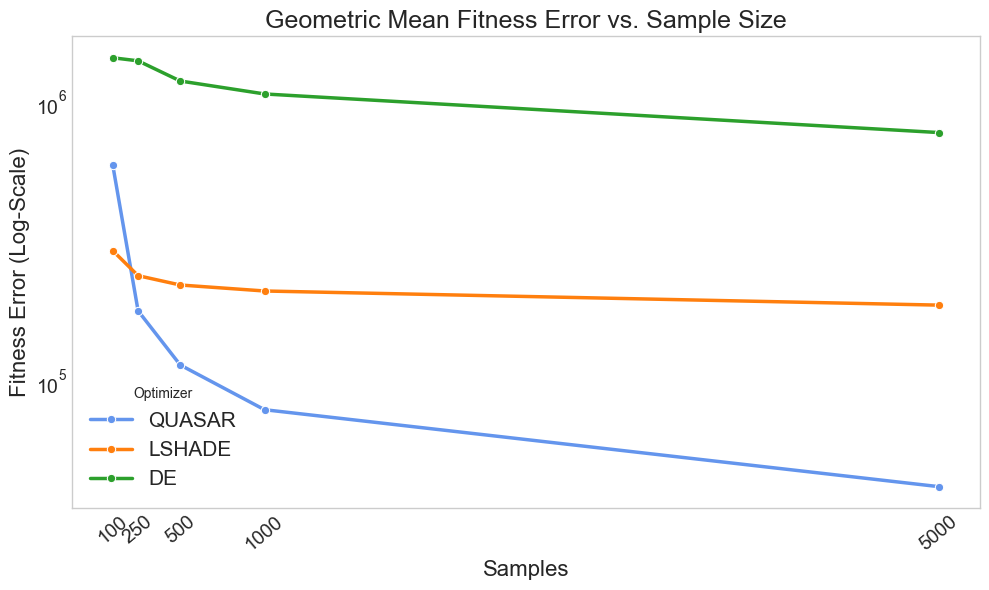

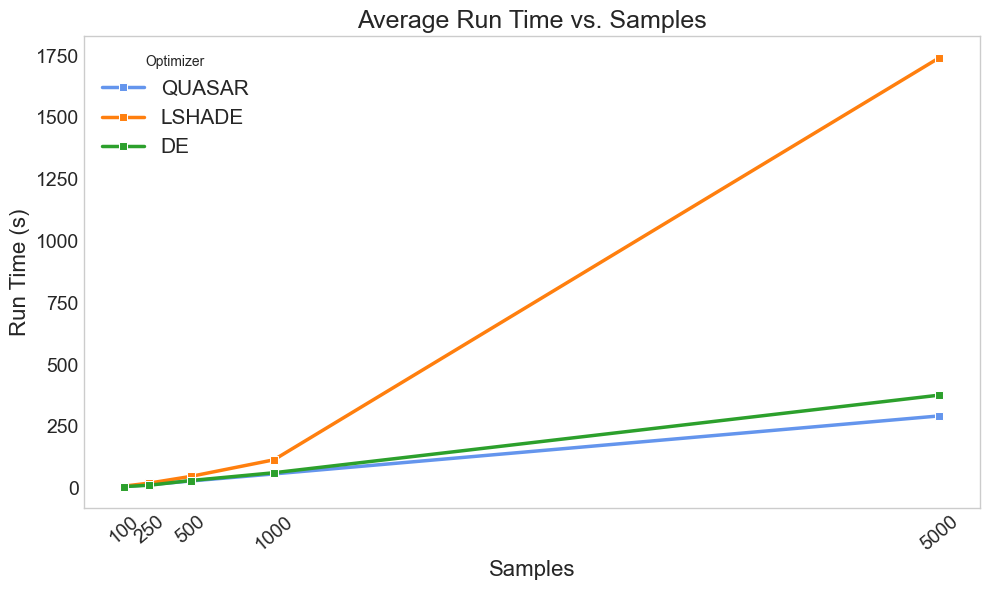

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats
import warnings

# suppress warnings
os.environ['PYTHONWARNINGS'] = 'ignore::UserWarning:scipy.stats'
warnings.filterwarnings('ignore', category=UserWarning)

sns.set_style('dark')

# misc definitions
results_filename = 'optimizer_cec_results_samples.csv'
export_folder = 'results'
optimizer_order = ['QUASAR', 'LSHADE', 'DE']

def get_overall_wilcoxon_p_value(df_full, metric_col, method1, method2):
    '''
    Calculates the overall Wilcoxon signed-rank test p-value for the difference
    in a metric between two methods across all Samples and functions.
    Uses 'run' index as sample / function combination.
    '''
    # pivot on all combinations (run)
    df_pivot = df_full.pivot_table(
        index=['Run'],
        columns='Method',
        values=metric_col
    ).dropna()
    
    if method1 not in df_pivot.columns or method2 not in df_pivot.columns or len(df_pivot) < 2:
        return np.nan
    
    # Wilcoxon signed-rank test on the paired differences
    wilcoxon_statistic, p_value = stats.wilcoxon(
        df_pivot[method1],
        df_pivot[method2],
        zero_method='pratt',
        alternative='two-sided' # two sided for general comparison
        )
    return p_value
    

def calculate_aggregated_rank_sum(df_full, rank_metric='Fitness_Value'):
    '''
    Calculates the Aggregated Rank Sum for each method across all unique
    experimental scenarios (Function, Samples).
    '''
    
    scenario_groups = ['Function', 'Samples', 'Method'] 
    
    df_median = df_full.groupby(scenario_groups)[rank_metric].median().reset_index()
    df_median = df_median.rename(columns={rank_metric: 'Median_Error'})
    
    df_pivot = df_median.pivot_table(
        index=['Function', 'Samples'], 
        columns='Method', 
        values='Median_Error'
        )
    
    present_methods = [m for m in optimizer_order if m in df_pivot.columns]
    df_pivot_ranked = df_pivot[present_methods].fillna(np.inf)
    
    df_ranks = df_pivot_ranked.rank(axis=1, method='average', ascending=True)
    
    aggregated_rank_sum = df_ranks.sum(axis=0).sort_values()
    os.makedirs('results', exist_ok=True)
    aggregated_rank_sum.to_csv('results/ranks_samples.csv')
    return aggregated_rank_sum

def get_p_value_wilcoxon_paired_fitness(df_full, sample, method1='QUASAR', method2='DE'):
    df_sample = df_full[df_full['Samples'] == sample]
    df_pivot = df_sample.pivot_table(index=['Run'],columns='Method',values='Fitness_Value').dropna()
    if method1 not in df_pivot.columns or method2 not in df_pivot.columns or len(df_pivot) < 2:
        return np.nan
    wilcoxon_statistic, p_value = stats.wilcoxon(
        df_pivot[method1],
        df_pivot[method2],
        zero_method='pratt' 
        )
    return p_value

def get_p_value_wilcoxon_paired_runtime(df_full, sample, method1='QUASAR', method2='DE'):
    df_sample = df_full[df_full['Samples'] == sample]
    df_pivot = df_sample.pivot_table(
        index=['Run'],
        columns='Method',
        values='Run_Time_Sec'
    ).dropna()
    if method1 not in df_pivot.columns or method2 not in df_pivot.columns or len(df_pivot) < 2:
        return np.nan
    wilcoxon_statistic, p_value = stats.wilcoxon(
        df_pivot[method1],
        df_pivot[method2],
        zero_method='pratt'
    )
    return p_value

def calculate_ci_for_paired_ratio(df_sample, metric_col, method_num, method_den, is_geometric=False, alpha=0.05):
    '''
    Calculates the mean of the paired ratios (Geometric for fitness, Arithmetic for run time)
    and its confidence interval for a specific sample size.
    '''
    df_pivot = df_sample.pivot_table(
        index=['Run'],
        columns='Method',
        values=metric_col
    ).dropna()
    if method_num not in df_pivot.columns or method_den not in df_pivot.columns or len(df_pivot) < 2:
        return np.nan, (np.nan, np.nan)
        
    den_values = df_pivot[method_den].replace(0, 1e-300)
    ratio_col = df_pivot[method_num] / den_values
    N = len(ratio_col)
    t_critical = stats.t.ppf(1 - alpha/2, N - 1)
    
    if is_geometric:
        log_ratio = np.log10(ratio_col.replace(0, 1e-300))
        mean_log = log_ratio.mean()
        std_log = log_ratio.std()
        se_log = std_log / np.sqrt(N)
        ci_lower_log = mean_log - t_critical * se_log
        ci_upper_log = mean_log + t_critical * se_log
        ratio_value = 10**mean_log
        ci = (10**ci_lower_log, 10**ci_upper_log)
    else:
        # Arithmetic Mean of Paired Ratios (AMR)
        ratio_value = ratio_col.mean()
        std_ratio = ratio_col.std()
        se_ratio = std_ratio / np.sqrt(N)
        ci_lower = ratio_value - t_critical * se_ratio
        ci_upper = ratio_value + t_critical * se_ratio
        ci = (ci_lower, ci_upper)
        
    return ratio_value, ci

def get_ratio_metrics(df_full, sample, method_num, method_den):
    df_sample = df_full[df_full['Samples'] == sample]
    gmr, gmr_ci = calculate_ci_for_paired_ratio(
        df_sample, metric_col='Fitness_Value', method_num=method_num, method_den=method_den, is_geometric=True
    )
    amr, amr_ci = calculate_ci_for_paired_ratio(
        df_sample, metric_col='Run_Time_Sec', method_num=method_num, method_den=method_den, is_geometric=False
    )
    return gmr, gmr_ci, amr, amr_ci

def load_and_aggregate_data(filename):
    df = pd.read_csv(filename)
    print(f'Number of trials in file: {df['trial_num'].nunique()}')
    print(f'Total number of records in file: {len(df)}')
    
    if 'Run' not in df.columns:
        df['Run'] = df['trial_num'].astype(str) + '_' + df['Function']
        
    agg_df = df.groupby(['Method', 'Samples']).agg(
        Mean_Fitness=('Fitness_Value', 'mean'),
        Std_Fitness=('Fitness_Value', 'std'),
        Mean_Runtime_Sec=('Run_Time_Sec', 'mean'),
        Std_Runtime_Sec=('Run_Time_Sec', 'std')
        ).reset_index()

    df['Log_Fitness'] = np.log10(df['Fitness_Value'].replace(0, 1e-300))
    geom_agg_df = df.groupby(['Method', 'Samples'])['Log_Fitness'].mean().reset_index()
    geom_agg_df['Geom_Mean_Fitness'] = 10**geom_agg_df['Log_Fitness']
    
    agg_df = agg_df.merge(geom_agg_df[['Method', 'Samples', 'Geom_Mean_Fitness']],
                          on=['Method', 'Samples'])

    return agg_df, df

def generate_plots(agg_df):
    samples = sorted(agg_df['Samples'].unique())
    os.makedirs('results', exist_ok=True)
    agg_df['Method'] = pd.Categorical(agg_df['Method'], categories=optimizer_order, ordered=True)
    agg_df = agg_df.sort_values('Method')
    custom_palette = {'QUASAR': 'cornflowerblue', 'LSHADE': 'C1', 'DE': 'C2'}
    
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=agg_df, x='Samples', y='Geom_Mean_Fitness', hue='Method', marker='o', errorbar=None, palette=custom_palette, linewidth=2.5)
    plt.yscale('log')
    plt.title('Geometric Mean Fitness Error vs. Sample Size', fontsize=18)
    plt.xlabel('Samples', fontsize=16)
    plt.ylabel('Fitness Error (Log-Scale)', fontsize=16)
    plt.legend(title='Optimizer', fontsize=15)
    plt.xticks(samples, rotation=40, fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(rf'results/{export_folder}_fitness_samples.png', dpi=300)
    print(f'Saved plot: {export_folder}_fitness_samples.png')

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=agg_df, x='Samples', y='Mean_Runtime_Sec', hue='Method', marker='s', palette=custom_palette, errorbar=None, linewidth=2.5)
    plt.title('Average Run Time vs. Samples', fontsize=18)
    plt.xlabel('Samples', fontsize=16)
    plt.ylabel('Run Time (s)', fontsize=16)
    plt.legend(title='Optimizer', fontsize=15)
    plt.xticks(samples, rotation=40, fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(rf'results/{export_folder}_runtime_samples.png', dpi=300)
    print(f'Saved plot: {export_folder}_runtime_samples.png')

def generate_tables(agg_df, df_full):
    samples = sorted(agg_df['Samples'].unique())
    
    # gmerf for all combinations
    ratio_ql_data = [get_ratio_metrics(df_full, s, 'LSHADE', 'QUASAR') for s in samples]
    ratio_qd_data = [get_ratio_metrics(df_full, s, 'DE', 'QUASAR') for s in samples]

    # fitness metrics
    gmr_ql = [r[0] for r in ratio_ql_data]
    gmr_ql_ci = [r[1] for r in ratio_ql_data]
    gmr_qd = [r[0] for r in ratio_qd_data]
    gmr_qd_ci = [r[1] for r in ratio_qd_data]
    
    # run time metrics
    amr_ql = [r[2] for r in ratio_ql_data] # arithmetic mean ratios for overall output
    amr_qd = [r[2] for r in ratio_qd_data] 
    amr_ql_ci = [r[3] for r in ratio_ql_data] # arithmetic mean CIs, still not using for now
    amr_qd_ci = [r[3] for r in ratio_qd_data] 

    # create fitness table
    fitness_table = agg_df.pivot(index='Samples', columns='Method', values='Geom_Mean_Fitness')
    present_methods = [m for m in optimizer_order if m in fitness_table.columns]
    raw_fitness_cols = {}
    for method in present_methods:
        raw_fitness_cols[f'{method} (Geom Mean)'] = (
            fitness_table[method].apply(lambda x: f'{x:.3e}') if method in fitness_table.columns else pd.Series('N/A', index=samples)
        )
    fitness_table_final = pd.DataFrame(raw_fitness_cols, index=samples)
    
    p_values_ql_fit = [get_p_value_wilcoxon_paired_fitness(df_full, s, 'QUASAR', 'LSHADE') for s in samples]
    p_values_qd_fit = [get_p_value_wilcoxon_paired_fitness(df_full, s, 'QUASAR', 'DE') for s in samples]

    # reformat fitness table
    def format_ratio(ratio): 
        return f'{ratio:.2f}' if not np.isnan(ratio) else 'N/A'
    def format_ci(ci): 
        return f'({ci[0]:.2f}, {ci[1]:.2f})' if not np.isnan(ci[0]) else 'N/A'

    gmr_ql_formatted = [format_ratio(r) for r in gmr_ql]
    gmr_ql_ci_formatted = [format_ci(ci) for ci in gmr_ql_ci]
    gmr_qd_formatted = [format_ratio(r) for r in gmr_qd]
    gmr_qd_ci_formatted = [format_ci(ci) for ci in gmr_qd_ci]

    new_cols_fit = [
        ('GM Error Ratio LSHADE/QUASAR', gmr_ql_formatted), ('95% CI (L/Q)', gmr_ql_ci_formatted),
        ('GM Error Ratio DE/QUASAR', gmr_qd_formatted), ('95% CI (D/Q)', gmr_qd_ci_formatted),
        ('p-value (Q vs LSHADE)', [f'{p:.3e}' if not np.isnan(p) else 'N/A' for p in p_values_ql_fit]),
        ('p-value (Q vs DE)', [f'{p:.3e}' if not np.isnan(p) else 'N/A' for p in p_values_qd_fit]),
        ]
    for name, series in reversed(new_cols_fit):
        fitness_table_final.insert(0, name, series, allow_duplicates=True)
        
    print('GMERF:')
    fitness_table_final.to_csv(r'results/statistical_results_samples.csv')
    display(fitness_table_final)


    # create run time table
    runtime_table = agg_df.pivot(index='Samples', columns='Method', values='Mean_Runtime_Sec')
    raw_runtime_cols = {}
    for method in present_methods:
        raw_runtime_cols[f'{method} (Mean Sec)'] = (
            runtime_table[method].apply(lambda x: f'{x:.3f}') if method in runtime_table.columns else pd.Series('N/A', index=samples)
        )
    runtime_table_final = pd.DataFrame(raw_runtime_cols, index=samples)

    # run time ratio as ratio of means
    runtime_ratio_ql_means = runtime_table.get('LSHADE', 0) / runtime_table.get('QUASAR', np.inf)
    runtime_ratio_qd_means = runtime_table.get('DE', 0) / runtime_table.get('QUASAR', np.inf)

    # reformat run time table
    def format_ratio_rt(ratio): 
        return f'{ratio:.2f}' if not np.isnan(ratio) and not np.isinf(ratio) else 'N/A'
    
    def format_ci_rt(ci):
        return f'({ci[0]:.2f}, {ci[1]:.2f})' if not np.isnan(ci[0]) else 'N/A'

    # ratio of means for table vals
    rom_ql_formatted = [format_ratio_rt(r) for r in runtime_ratio_ql_means] 
    rom_qd_formatted = [format_ratio_rt(r) for r in runtime_ratio_qd_means] 
    
    # still not using CIs
    amr_ql_ci_formatted = [format_ci_rt(ci) for ci in amr_ql_ci] 
    amr_qd_ci_formatted = [format_ci_rt(ci) for ci in amr_qd_ci] 

    # calculate run time p values
    p_values_ql_rt = [get_p_value_wilcoxon_paired_runtime(df_full, s, 'QUASAR', 'LSHADE') for s in samples]
    p_values_qd_rt = [get_p_value_wilcoxon_paired_runtime(df_full, s, 'QUASAR', 'DE') for s in samples]

    new_cols_rt = [
        ('Run Time Ratio LSHADE/QUASAR', rom_ql_formatted), # run time ratio = ratio of means
        ('95% CI (L/Q)', amr_ql_ci_formatted), 
        ('Run Time Ratio DE/QUASAR', rom_qd_formatted),     
        ('95% CI (D/Q)', amr_qd_ci_formatted), 
        ('p-value (Q vs LSHADE)', [f'{p:.3e}' if not np.isnan(p) else 'N/A' for p in p_values_ql_rt]),
        ('p-value (Q vs DE)', [f'{p:.3e}' if not np.isnan(p) else 'N/A' for p in p_values_qd_rt]),
        ]

    for name, series in reversed(new_cols_rt):
        runtime_table_final.insert(0, name, series, allow_duplicates=True)

    runtime_table_final.to_csv(r'results/run_times_samples.csv')
    print('Run time ratio')

    display(runtime_table_final)

    return gmr_ql, amr_ql, gmr_qd, amr_qd 

def aggregate_paired_ratios(ratio_values, is_geometric=False, alpha=0.05):
    '''
    Aggregates a list of per-sample ratios (AMR or GMR) into a single overall
    metric using the arithmetic mean (for AMR) or geometric mean (for GMR) of the ratios.
    '''
    valid_ratios = np.array([r for r in ratio_values if not np.isnan(r)])
    N = len(valid_ratios)
    if N < 2: return np.nan, (np.nan, np.nan)
    t_critical = stats.t.ppf(1 - alpha/2, N - 1)

    if is_geometric:
        log_ratio = np.log10(valid_ratios.clip(min=1e-300))
        mean_log = log_ratio.mean()
        std_log = log_ratio.std(ddof=1)
        se_log = std_log / np.sqrt(N)
        ci_lower_log = mean_log - t_critical * se_log
        ci_upper_log = mean_log + t_critical * se_log
        overall_ratio = 10**mean_log
        ci = (10**ci_lower_log, 10**ci_upper_log)
    else:
        # overall arithmetic average
        overall_ratio = valid_ratios.mean()
        std_ratio = valid_ratios.std(ddof=1) 
        se_ratio = std_ratio / np.sqrt(N)
        ci_lower = overall_ratio - t_critical * se_ratio
        ci_upper = overall_ratio + t_critical * se_ratio
        ci = (ci_lower, ci_upper)
    return overall_ratio, ci


# run analysis
agg_data, raw_data = load_and_aggregate_data(results_filename)
if agg_data is not None and raw_data is not None:
    
    # aggregated rank sum
    overall_ranks = calculate_aggregated_rank_sum(raw_data)
    print('\nOVERALL AGGREGATED RANK SUM')
    display(overall_ranks)
    
    generate_plots(agg_data)
    
    # generate final tables
    # amr_ql/qd returned here are the Mean of Ratios (AMR) per sample
    gmr_ql, amr_ql, gmr_qd, amr_qd = generate_tables(agg_data, raw_data)
    
    
    # overall geometric aggregate ratios for fitness error
    print('\nOVERALL FITNESS IMPROVEMENT RATIO (GMR):')
    gmr_lq_fit, gmr_lq_fit_ci = aggregate_paired_ratios(gmr_ql, is_geometric=True)
    gmr_dq_fit, gmr_dq_fit_ci = aggregate_paired_ratios(gmr_qd, is_geometric=True)
    
    # overall GMERF p values
    p_ql_fit = get_overall_wilcoxon_p_value(raw_data, 'Fitness_Value', 'LSHADE', 'QUASAR')
    p_qd_fit = get_overall_wilcoxon_p_value(raw_data, 'Fitness_Value', 'DE', 'QUASAR')
    
    print(f'LSHADE / QUASAR Overall GMR: {gmr_lq_fit:.3f}x (95% CI: {gmr_lq_fit_ci[0]:.3f}, {gmr_lq_fit_ci[1]:.3f}) (p={p_ql_fit:.3e})')
    print(f'DE / QUASAR Overall GMR:     {gmr_dq_fit:.3f}x (95% CI: {gmr_dq_fit_ci[0]:.3f}, {gmr_dq_fit_ci[1]:.3f}) (p={p_qd_fit:.3e})')

    # overall run time aggregates
    amr_lq_rt_overall, amr_lq_rt_ci = aggregate_paired_ratios(amr_ql, is_geometric=False)
    amr_dq_rt_overall, amr_dq_rt_ci = aggregate_paired_ratios(amr_qd, is_geometric=False)
    
    # overall run time p values
    p_ql_rt = get_overall_wilcoxon_p_value(raw_data, 'Run_Time_Sec', 'LSHADE', 'QUASAR')
    p_qd_rt = get_overall_wilcoxon_p_value(raw_data, 'Run_Time_Sec', 'DE', 'QUASAR')
    
    print('\nOVERALL AVERAGE RUN TIME RATIO (AMR):')
    print(f'LSHADE / QUASAR Overall AMR: {amr_lq_rt_overall:.3f}x (95% CI: {amr_lq_rt_ci[0]:.3f}, {amr_lq_rt_ci[1]:.3f}) (p={p_ql_rt:.3e})')
    print(f'DE / QUASAR Overall AMR:     {amr_dq_rt_overall:.3f}x (95% CI: {amr_dq_rt_ci[0]:.3f}, {amr_dq_rt_ci[1]:.3f}) (p={p_qd_rt:.3e})')